In [1]:
import warnings
warnings.filterwarnings('ignore')

### Preprocessing the Data

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("train_data.csv", names=("z", "x", "action"))
data.head()

,z,x,action
0,0.812164,-0.129181,UP
1,4.994400,0.672974,UP
2,8.246658,-0.271927,UP
3,2.440964,-0.862076,UP
4,2.847885,-0.505219,UP


In [4]:
horizontal_data = data[ data.action.isin(("LEFT", "RIGHT", "STILL")) ].replace({"action" : {"LEFT": -1, "STILL": 0, "RIGHT": 1}})
vertical_data   = data[ data.action.isin(("UP",   "DOWN",  "STILL")) ].replace({"action" : {"DOWN": -1, "STILL": 0, "UP": 1}})

### Training the Model

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
model_v = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model_h = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [7]:
model_h.fit(horizontal_data[["x"]], horizontal_data["action"])
model_v.fit(vertical_data[["z"]],   vertical_data["action"])

LogisticRegression(multi_class='multinomial')

### Testing

In [8]:
mapping_h = {-1: "LEFT", 0: "STILL", 1: "RIGHT"}
mapping_v = {-1: "DOWN", 0: "STILL", 1: "UP"}

def predictor(data):
    x = model_h.predict( [[data[1]]] )[0]
    z = model_v.predict( [[data[0]]] )[0]
    print("HORIZONTAL MOVEMENT :", mapping_h[ x ])
    print("VERTICAL MOVEMENT   :", mapping_v[ z ])

In [9]:
SAMPLE = [-.379745483, -5.199996948]  # RIGHT
predictor(SAMPLE)

HORIZONTAL MOVEMENT : RIGHT
VERTICAL MOVEMENT   : STILL


### Visualization

In [10]:
import matplotlib.pyplot as plt

In [11]:
# sample data range
x  = pd.DataFrame( np.linspace(-8,8,100) )
y1 = model_h.predict( x )
y2 = model_v.predict( x )

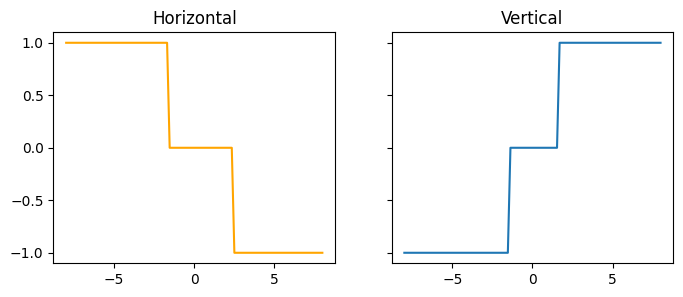

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,3))

ax1.plot(x, y1, label="Horizontal", color="orange")
ax1.set_title("Horizontal")

ax2.plot(x, y2, label="Vertical")
ax2.set_title("Vertical")

f.show()

### Saving the model

In [13]:
import pickle

In [14]:
print( model_h )
print( model_v )

with open ("model_v.pkl", 'wb') as file:
    file.write( pickle.dumps(model_v) )

with open ("model_h.pkl", 'wb') as file:
    file.write( pickle.dumps(model_h) )

LogisticRegression(multi_class='multinomial')
LogisticRegression(multi_class='multinomial')


In [15]:
# loading saved models

with open ("model_v.pkl", 'rb') as file:
    m1 = pickle.loads( file.read() )

with open ("model_h.pkl", 'rb') as file:
    m2 = pickle.loads( file.read() )

print( m1 )
print( m2 )

LogisticRegression(multi_class='multinomial')
LogisticRegression(multi_class='multinomial')
